In [275]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy import stats

# Q1

#### The probability distribution function is the probability of the values of a random variable as the function of the value of the random variable.
#### The cumulative distribution function is the definite integral of the probability distribution function. 
#### The integral of the probability density function over the whole range of the possible values of the random variable gives 1. 
#### Integrating the pdf between values x1 and x2 the result gives the probability of the outcome of the random variable 

# Q2

In [160]:
df = pd.read_csv("galton-stata11.tab", sep="\t")

In [161]:
df

,family,father,mother,gender,height,kids,male,female
0,1,78.5,67.0,M,73.2,4,1.0,0.0
1,1,78.5,67.0,F,69.2,4,0.0,1.0
2,1,78.5,67.0,F,69.0,4,0.0,1.0
3,1,78.5,67.0,F,69.0,4,0.0,1.0
4,2,75.5,66.5,M,73.5,4,1.0,0.0
...,...,...,...,...,...,...,...,...
893,136A,68.5,65.0,M,68.5,8,1.0,0.0
894,136A,68.5,65.0,M,67.7,8,1.0,0.0
895,136A,68.5,65.0,F,64.0,8,0.0,1.0
896,136A,68.5,65.0,F,63.5,8,0.0,1.0


In [162]:
df_male=df[df["gender"]=='M']
df_female=df[df["gender"]=='F']

In [163]:
df_male['height'].describe()

count    465.000000
mean      69.228817
std        2.631594
min       60.000000
25%       67.500000
50%       69.200000
75%       71.000000
max       79.000000
Name: height, dtype: float64

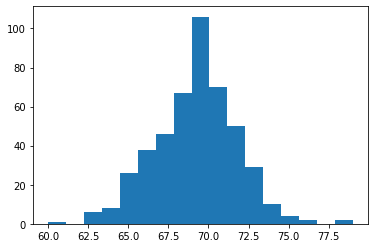

In [164]:
plt.hist(df_male['height'], bins=17)
plt.show()

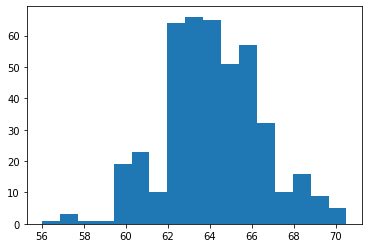

In [165]:
plt.hist(df_female['height'], bins=17)
plt.show()

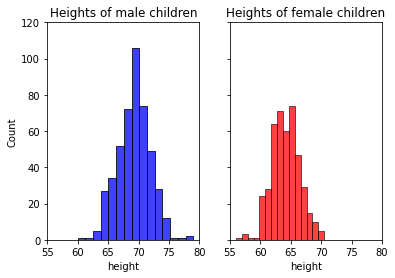

In [166]:
list = ('M', 'F')
list2 =("male", "female")
color = ('Blue', 'Red')
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)
plt.xlim(55,80)
plt.xticks([55, 60, 65, 70, 75, 80])
plt.ylim(0,120)
for k, gender in enumerate(list):
    sns.histplot(x='height', data=df[df["gender"]==gender], ax=axes[k], color=color[k], bins=15).set(title='Heights of {} children'.format(list2[k]))
    


### 2/b the data show a normal distribution
### 2/a the number of bins sis chose to show one maximum but not an artificially high number of maxima (trial and error :()

# Q3

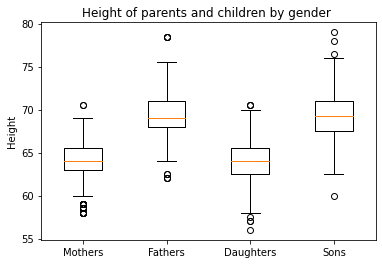

In [167]:
fig, ax = plt.subplots()
ax.boxplot([df['mother'], df['father'], df_female['height'], df_male['height']])
ax.set_xticklabels(['Mothers', 'Fathers', 'Daughters', 'Sons'])
plt.title("Height of parents and children by gender ")
ax.set_ylabel('Height')
plt.show()

### 3/a Women, regardless of age, have a lower height than men.

# Q4

In [168]:
# As the question is about all persons, we have to collect all persons in one dataframe. 
# We first group the dataframe by family, then extract the height of the father and the mother from each family
df_fathers=df.groupby('family')['father'].unique().astype(float)
df_mothers=df.groupby('family')['mother'].unique().astype(float)

In [169]:
df_parents=pd.concat([df_fathers, df_mothers], axis=0)

In [170]:
# as the mother and the father from the same family have the same index, we reindex the parents dataset
df_parents.reset_index(drop=True, inplace=True)

In [171]:
df_parents

0      78.5
1      74.0
2      69.0
3      69.0
4      69.0
       ... 
389    58.5
390    58.0
391    68.5
392    67.0
393    66.0
Length: 394, dtype: float64

In [172]:
# we concatenate the databases displaying the heights of the children and that of  parents
df_persons=pd.concat([df_parents, df['height']], axis=0)

In [173]:
df_persons.reset_index(drop=True, inplace=True)

In [174]:
df_persons

0       78.5
1       74.0
2       69.0
3       69.0
4       69.0
        ... 
1287    68.5
1288    67.7
1289    64.0
1290    63.5
1291    63.0
Length: 1292, dtype: float64

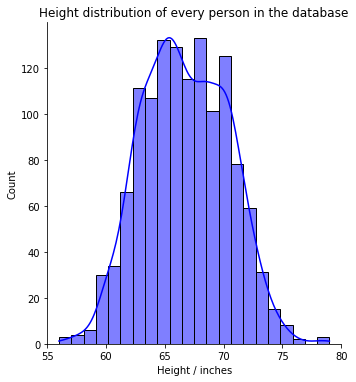

In [175]:
# the heights of all persons are plotted and a probability density function is estimated 
sns.displot(df_persons, kde=True, bins=22, color='Blue')
plt.xlabel("Height / inches")
plt.xlim(55,80)
plt.xticks([55, 60, 65, 70, 75, 80])
plt.title("Height distribution of every person in the database")
plt.show()

In [176]:
# this looks like a bimodal distribution. Perhaps because of the difference of male and female heights? Let's check out!

In [177]:
df_daughters=df_female['height']
df_sons=df_male['height']

In [178]:
df_males=pd.concat([df_fathers, df_sons], axis=0)
df_males.reset_index(drop=True, inplace=True)

In [179]:
df_females=pd.concat([df_mothers, df_daughters], axis=0)
df_females.reset_index(drop=True, inplace=True)

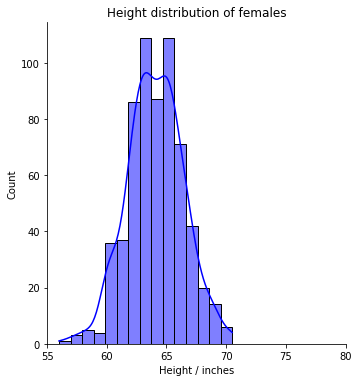

In [180]:
sns.displot(df_females, kde=True, bins=15, color='Blue')
plt.xlabel("Height / inches")
plt.xlim(55,80)
plt.xticks([55, 60, 65, 70, 75, 80])
plt.title("Height distribution of females")
plt.show()

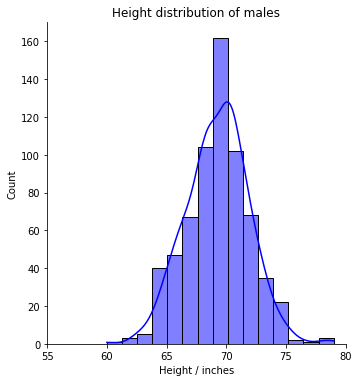

In [181]:
sns.displot(df_males, kde=True, bins=15, color='Blue')
plt.xlabel("Height / inches")
plt.xlim(55,80)
plt.xticks([55, 60, 65, 70, 75, 80])
plt.title("Height distribution of males")
plt.show()

In [182]:
#Anyway, let's fit a normal distribution 

In [183]:
mu_p, std_p = norm.fit(df_persons)

In [184]:
mu_p

66.73204334365326

In [185]:
std_p

3.604659588275616

In [186]:
norm.sf(78, mu_p, std_p)

0.0008861826410711563

### the probability of a person being taller than 78 inches is 0.00089

In [324]:
# sanity check: number of persons taller than 78 inches divided by the total number of persons:
len(df_persons[df_persons>78])/len(df_persons)

0.0015479876160990713

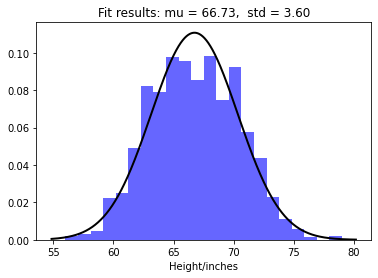

In [268]:
# a histogram of the combined heights of all persons, together with the fitted normal distribution
plt.hist(df_persons, bins=22, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, len(df_persons))
p = norm.pdf(x, mu_p, std_p)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Height/inches')
title = "Fit results: mu = %.2f,  std = %.2f" % (mu_p, std_p)
plt.title(title)

plt.show()

# Q5

In [ ]:
df_fathers=df.groupby('family')['father'].unique().astype(float)
df_mothers=df.groupby('family')['mother'].unique().astype(float)
df_nr_kids=df.groupby('family')['kids'].unique().astype(float)

In [189]:
def var_s(array):
    return np.var(array)*len(array)/(len(array)-1)

In [248]:
std_list=[]
for name in [df_fathers, df_mothers, df['height'], df_nr_kids, df['male'], df['female']]:
    std_list.append(np.std(name))

In [252]:
std_df=pd.DataFrame(std_list)

In [254]:
svar_list=[]
for name in [df_fathers, df_mothers, df['height'], df_nr_kids, df['male'], df['female']]:
    svar_list.append(var_s(name))
svar_df=pd.DataFrame(svar_list)
svar_df

,0
0,6.875063
1,5.548884
2,12.837305
3,7.237025
4,0.249961
5,0.249961


In [257]:
sample_name=pd.DataFrame(['Height (father) / inches', 'Height (mother) / inches', 'Height (child) / inches','Number of children', 'Male', 'Female'])
sample_name

,0
0,Height (father) / inches
1,Height (mother) / inches
2,Height (child) / inches
3,Number of children
4,Male
5,Female


In [264]:
df_stat=pd.concat([sample_name, svar_df, std_df], axis=1).round(decimals=3)

In [265]:
df_stat.columns=['Group', 'Sample variation','Standard deviation']

In [266]:
df_stat

,Group,Sample variation,Standard deviation
0,Height (father) / inches,6.875,2.615
1,Height (mother) / inches,5.549,2.350
2,Height (child) / inches,12.837,3.581
3,Number of children,7.237,2.683
4,Male,0.250,0.500
5,Female,0.250,0.500


### 5/a Sample variation and not population variation because we compensate for uncertainty of not sampling the whole population

### 5/b As the standard deviation is the square root of the sample variation (disregarding a factor len(data)/(len(data)-1), which is close to 1 in all cases), they convey the same information
### The variation of the height of children is much higher than that of the adults
### Calculating sample variation and deviation for numerical but basically categorical data doesn't make sense
### Variance in the number of children is high

### 5/c Scales
### 'father', mother', 'height'': ratio
### 'male', female'': nominal
### kids: cardinal

# Q6

In [298]:
stats.percentileofscore(df['height'],75)

99.38752783964365

In [ ]:
### A child who is 75 inches tall is in the lower 99.4 percentile, i.e. the upper 0.6 percentile

In [299]:
stats.percentileofscore(df['height'],55)

0.0

In [301]:
df['height'].min()

56.0

In [ ]:
### there is no such child who is 55 inches tall as the minimum height is 56 inches

In [ ]:
mu_c, std_c = norm.fit(df['height'])

In [309]:
np.random.seed(1)
height_norm = norm.rvs(mu_c, std_c, size=len(df['height']))

In [310]:
height_norm

array([72.57734605, 64.57003783, 64.86934806, 62.91847244, 69.85964848,
       58.51905764, 73.00872695, 64.03486715, 67.90314485, 65.86771432,
       71.99638632, 59.38348523, 65.60613925, 65.38542136, 70.82063146,
       62.82206452, 66.14323829, 63.61714705, 66.9118546 , 68.84770681,
       62.81945793, 70.85985785, 69.98921734, 68.56008394, 69.98658619,
       64.31231363, 66.32062999, 63.40977216, 65.80140385, 68.6598525 ,
       64.28390655, 65.33994661, 64.29997792, 63.73407413, 64.35700973,
       66.71533947, 62.75968813, 67.60011498, 72.70431417, 69.4178934 ,
       66.07374209, 63.58215948, 64.08517413, 72.82123998, 66.94262908,
       64.47965808, 67.44434407, 74.28154229, 67.19097038, 68.97084722,
       67.83557722, 65.49931086, 62.66942076, 65.50972104, 66.01265626,
       68.86134288, 69.7650254 , 70.09489525, 67.78335664, 69.93031275,
       64.05924951, 71.24711478, 68.5974526 , 65.69324294, 68.51003628,
       66.49007394, 70.81296809, 72.20303737, 74.5870676 , 61.75

In [311]:
stats.percentileofscore(height_norm,75)

99.10913140311804

In [312]:
stats.percentileofscore(height_norm,55)

0.0

In [ ]:
### by simulating a normal distribution with the same mean, std and size as the original dataset, we get slightly different results

# Q7

In [313]:
df_males

0      78.5
1      74.0
2      69.0
3      69.0
4      69.0
       ... 
657    72.0
658    70.5
659    68.7
660    68.5
661    67.7
Length: 662, dtype: float64

In [315]:
df_males.quantile(0.2)

67.0

### 80 percent of males are taller than 67 inches. sanity check:

In [319]:
len(df_males[df_males>67])/len(df_males)

0.7673716012084593

In [323]:
len(df_males[df_males>66.9])/len(df_males)

0.8338368580060423

# Q8

#### There are 3 rooms; in 1 of them there is a present, in the others there is nothing. I choose room 1 without opening it. My partner opens one of the remaining rooms which doesn’t have the present. 
#### The question is if it is worth changing my initial guess. 
#### Let be P(Pr) the probability of the event M that the present is in room 1. Obviously, P(Pr)=1/3.
#### Let be P(N) the probability of the event that in there is nothing in the room opened by my partner. Obviously, P(N)=1 as they’s always open an empty room.
#### From Bayes’theorem: P(Pr|N)*P(N)=P(N|Pr)*P(Pr).
#### Note that P(N|Pr)=1 , i.e. the probability that the room opened by my partner is empty, given that there is the present in room 1, is 1 – because my partner always opens the empty room
#### Thus, P(Pr|N)=1/3, i.e. the probability that there is a present in room 1 (my initial guess), given that my partner opened an empty room, is 1/3.
#### Thus, the probability that the present is in the room still closed (not opened by my partner neither chosen by me) is 2/3. Thus, it is worth changing my initial guess.
